In [1]:
# Packages and libraries

from time import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from sklearn import (manifold, datasets, decomposition, ensemble, random_projection)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

(901, 64)


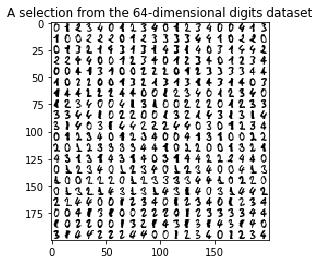

In [2]:
digits = datasets.load_digits(n_class=5)
X = digits.data
y = digits.target
print (X.shape)
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))
plt.imshow(img, cmap=plt.cm.binary)
plt.title('A selection from the 64-dimensional digits dataset')

#LLE,Isomap,LTSA,n_neighbors
n_neighbors = 30

In [3]:
def plot_embedding_2d(X, title=None):
 
    x_min, x_max = np.min(X,axis=0), np.max(X,axis=0)
    X = (X - x_min) / (x_max - x_min)

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    for i in range(X.shape[0]):
        ax.text(X[i, 0], X[i, 1],str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if title is not None:
        plt.title(title)

In [4]:
def plot_embedding_3d(X, title=None):

    x_min, x_max = np.min(X,axis=0), np.max(X,axis=0)
    X = (X - x_min) / (x_max - x_min)

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    for i in range(X.shape[0]):
        ax.text(X[i, 0], X[i, 1], X[i,2],str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if title is not None:
        plt.title(title)

Computing random projection


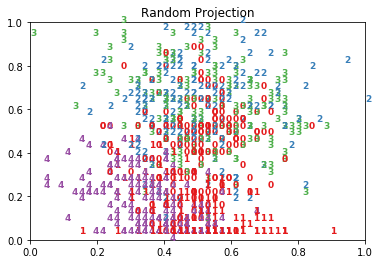

In [5]:
# Random Projection

print("Computing random projection")
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
X_projected = rp.fit_transform(X)
plot_embedding_2d(X_projected, "Random Projection")

Computing PCA projection


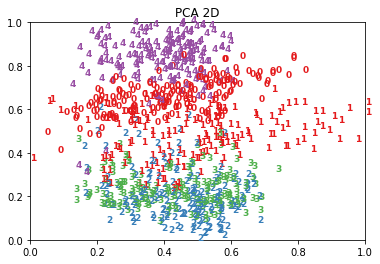

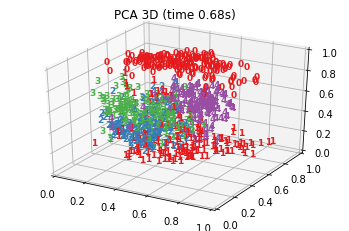

In [6]:
# PCA Projection

print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=3).fit_transform(X)
plot_embedding_2d(X_pca[:,0:2],"PCA 2D")
plot_embedding_3d(X_pca,"PCA 3D (time %.2fs)" %(time() - t0))

Computing LDA projection


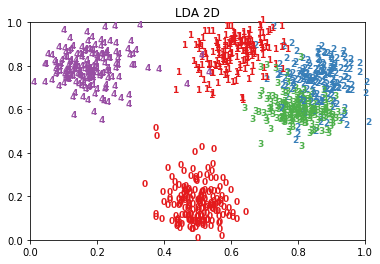

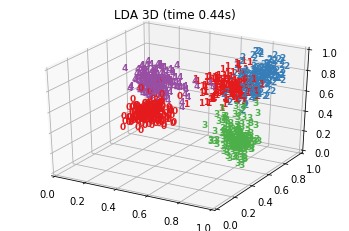

In [7]:
# Liner Discriminant Analysis

print("Computing LDA projection")
X2 = X.copy()
X2.flat[::X.shape[1] + 1] += 0.01  # Make X invertible
t0 = time()
X_lda = LDA(n_components=3).fit_transform(X2, y)
plot_embedding_2d(X_lda[:,0:2],"LDA 2D" )
plot_embedding_3d(X_lda,"LDA 3D (time %.2fs)" %(time() - t0))

Computing Isomap embedding
Done.


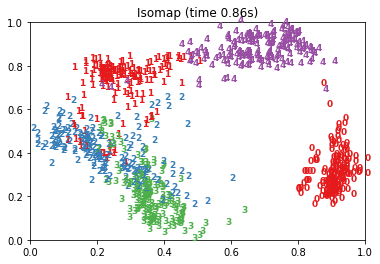

In [12]:
# Compute Isomap

print("Computing Isomap embedding")
t0 = time()
X_iso = manifold.Isomap(n_neighbors, n_components=2).fit_transform(X)
print("Done.")
plot_embedding_2d(X_iso,"Isomap (time %.2fs)" %(time() - t0))

Computing LLE embedding
Done. Reconstruction error: 1.11354e-06


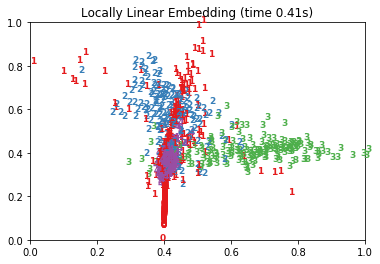

In [13]:
# Standard Locally Linear Embedding

print("Computing LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,method='standard')
t0 = time()
X_lle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding_2d(X_lle,"Locally Linear Embedding (time %.2fs)" %(time() - t0))

Computing modified LLE embedding
Done. Reconstruction error: 0.282943


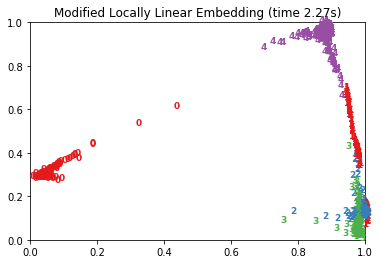

In [14]:
# Modified LLE

print("Computing modified LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,method='modified')
t0 = time()
X_mlle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding_2d(X_mlle,"Modified Locally Linear Embedding (time %.2fs)" %(time() - t0))

Computing Hessian LLE embedding
Done. Reconstruction error: 0.158405


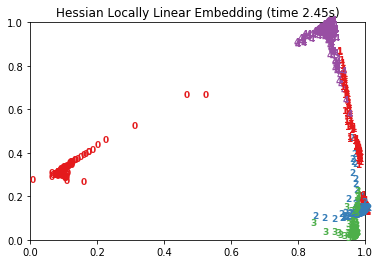

In [15]:
# Hessian LLE

print("Computing Hessian LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,method='hessian')
t0 = time()
X_hlle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding_2d(X_hlle,"Hessian Locally Linear Embedding (time %.2fs)" %(time() - t0))

Computing LTSA embedding
Done. Reconstruction error: 0.158395


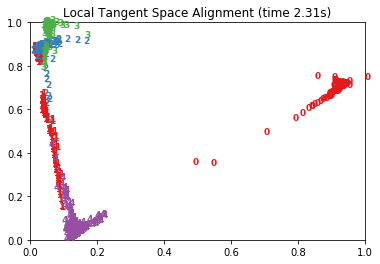

In [16]:
# LTSA

print("Computing LTSA embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,method='ltsa')
t0 = time()
X_ltsa = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding_2d(X_ltsa,"Local Tangent Space Alignment (time %.2fs)" %(time() - t0))

Computing MDS embedding
Done. Stress: 88618164.866996


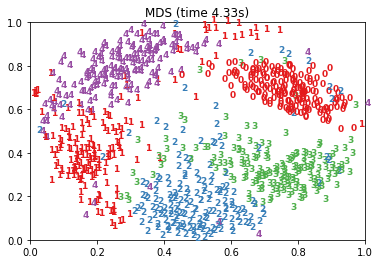

In [17]:
# Multi-dimensional scaling

print("Computing MDS embedding")
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
t0 = time()
X_mds = clf.fit_transform(X)
print("Done. Stress: %f" % clf.stress_)
plot_embedding_2d(X_mds,"MDS (time %.2fs)" %(time() - t0))

In [18]:
# Random Trees

print("Computing Totally Random Trees embedding")
hasher = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0,max_depth=5)
t0 = time()
X_transformed = hasher.fit_transform(X)
pca = decomposition.TruncatedSVD(n_components=2)
X_reduced = pca.fit_transform(X_transformed)

Computing Totally Random Trees embedding


Computing Spectral embedding


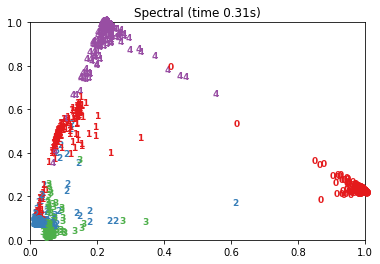

In [19]:
# Spectral

print("Computing Spectral embedding")
embedder = manifold.SpectralEmbedding(n_components=2, random_state=0,eigen_solver="arpack")
t0 = time()
X_se = embedder.fit_transform(X)
plot_embedding_2d(X_se,"Spectral (time %.2fs)" %(time() - t0))

Computing t-SNE embedding
(901, 3)


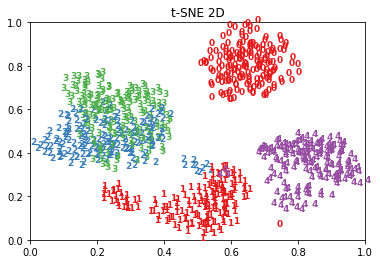

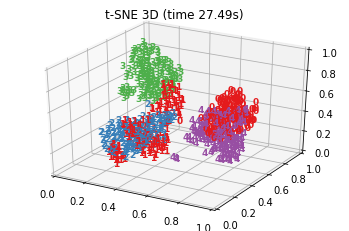

In [20]:
# t-distributed Stochastic Neighbor Embedding

print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=3, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)
print (X_tsne.shape)
plot_embedding_2d(X_tsne[:,0:2],"t-SNE 2D")
plot_embedding_3d(X_tsne,"t-SNE 3D (time %.2fs)" %(time() - t0))

plt.show()